In [3]:
import sys
sys.path.append('../..')
from utilities.get_data import get_historical_from_db
import pandas as pd
import ccxt
import matplotlib.pyplot as plt
import ta
import pandas_ta as pda
import matplotlib.pyplot as plt

In [4]:
# --- Load Data ---
pair = "ETH/USDT"
tf = "1h"

df = get_historical_from_db(ccxt.binance(),pair,tf,path="../../database/")
df

,open,high,low,close,volume
date,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029
...,...,...,...,...,...
2022-05-01 08:00:00,2766.40,2782.00,2765.18,2778.31,12854.70750
2022-05-01 09:00:00,2778.31,2780.64,2756.80,2768.31,8475.55070
2022-05-01 10:00:00,2768.32,2775.87,2761.00,2766.42,8231.25800


In [6]:
df['EMA90']=ta.trend.ema_indicator(df['close'], 90)
df['STOCH_RSI']=ta.momentum.stochrsi(df['close'])
ST_length = 20
ST_multiplier = 3.0

superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 20
ST_multiplier = 4.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 40
ST_multiplier = 8.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
df

,open,high,low,close,volume,EMA90,STOCH_RSI,SUPER_TREND,SUPER_TREND_DIRECTION1,SUPER_TREND_DIRECTION2,SUPER_TREND_DIRECTION3
date,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877,NaN,NaN,0.000000,1,1,1
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246,NaN,NaN,NaN,1,1,1
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672,NaN,NaN,NaN,1,1,1
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510,NaN,NaN,NaN,1,1,1
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01 08:00:00,2766.40,2782.00,2765.18,2778.31,12854.70750,2840.942057,0.994171,2948.732828,-1,-1,-1
2022-05-01 09:00:00,2778.31,2780.64,2756.80,2768.31,8475.55070,2839.345749,0.857287,2948.732828,-1,-1,-1
2022-05-01 10:00:00,2768.32,2775.87,2761.00,2766.42,8231.25800,2837.742985,0.831199,2948.732828,-1,-1,-1


        i        result
7    80.0  23834.433048
8    90.0  23949.906557
10  110.0  24865.993236
12  130.0  25371.118075
9   100.0  25891.442982
11  120.0  26698.740987
6    70.0  27422.705574
13  140.0  31122.069632
5    60.0  31790.594316
14  150.0  32204.575327
18  190.0  32441.098505
17  180.0  32582.569155
4    50.0  33169.018945
0    10.0  33555.612675
3    40.0  35997.796696
1    20.0  36454.501892
2    30.0  38380.796898
16  170.0  38394.268545
15  160.0  42492.050793


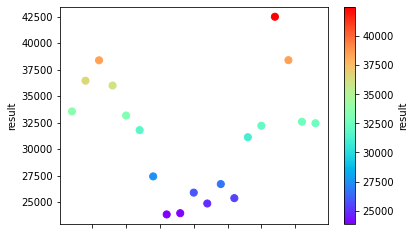

In [7]:
dt = None
dt = pd.DataFrame(columns = ['i', 'result'])
count=0

for i in range(10,200,10):
      # ST_length = 20
      # ST_multiplier = 3.0
      # superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
      # df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
      # df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

      # ST_length = 20
      # ST_multiplier = 4.0
      # superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
      # df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
      # df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

      # ST_length = 40
      # ST_multiplier = 8.0
      # superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
      # df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
      # df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
      df['EMA50']=ta.trend.sma_indicator(df['close'], i)

      dfTest = df.copy()
      usdt = 1000
      coin = 0
      fee = 0.0007
      wallet = 1000

      for index, row in dfTest.iterrows():
          #BUY
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
              buyPrice = row['close']
              coin = usdt/buyPrice
              coin = coin - fee*coin
              usdt = 0
              wallet = coin * row['close']
              #print("buy btc at ",df['close'][index]," || ",df['timestamp'][index], " || I have ",fiat,"$ and ",btc," btc")
          #SELL
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2 and coin > 0:
              sellPrice = row['close']
              usdt = coin*sellPrice
              usdt = usdt - fee*usdt
              coin = 0
              wallet = usdt
              #print("sell btc at ",df['close'][index]," || ",df['timestamp'][index], "|| I have ",fiat,"$ and ",btc," btc")
      myrow = {'i': i,'result': wallet}
      dt = dt.append(myrow,ignore_index=True) 
print(dt.sort_values(by=['result']))
dt.plot.scatter(x='i',y=1,c='result',s=50,colormap='rainbow') 
plt.show()    

Period : [2017-08-17 04:00:00] -> [2022-05-01 12:00:00]
Starting balance : 1000 $
Final balance : 27788.19 $
Performance vs US Dollar : 2678.82 %
Buy and Hold Performence : 815.75 %
Performance vs Buy and Hold : 228.39 %
Number of negative trades :  182
Number of positive trades :  113
Average Positive Trades :  9.27 %
Average Negative Trades :  -3.18 %
Best trade +62.94 %, the  2021-01-04 12:00:00
Worst trade -12.51 %, the  2022-02-24 07:00:00
Worst drawBack -59.0 %
Total fee :  7512.28 $
PLOT


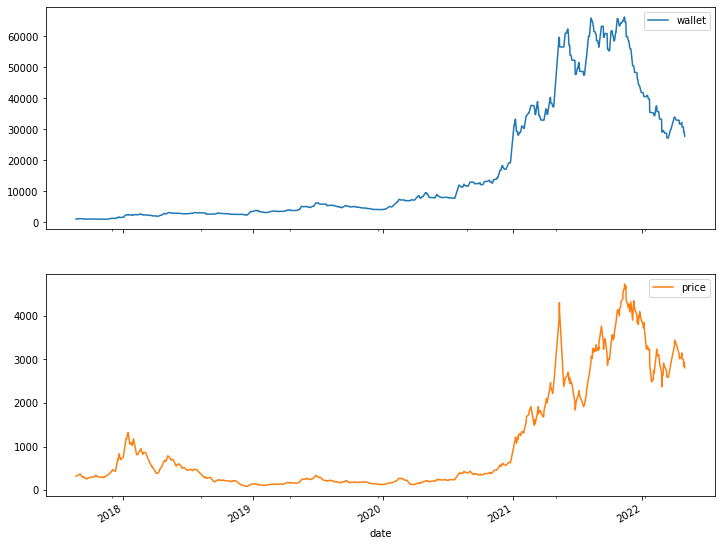

In [9]:
dfTest = df.copy()
# dfTest = df['2021-01-01':]
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastRow = dfTest.iloc[0]
fee = 0.0007
stopLoss = 0
goOn = True

for index, row in dfTest.iterrows():
  #Buy
  # if row['SUPER_TREND_DIRECTION'] == 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA90'] and usdt > 0 and goOn == True:
    buyPrice = row['close']
    # stopLoss = buyPrice - 0.02 * buyPrice
    coin = usdt / buyPrice
    frais = fee * coin
    coin = coin - frais
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet
    # print("Buy COIN at",buyPrice,'$ the', index)
    myrow = {'date': index,'position': "Buy",'price': buyPrice,'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  #Stop Loss
  elif row['low'] < stopLoss and coin > 0:
    sellPrice = stopLoss
    usdt = coin * sellPrice
    frais = 0.005 * usdt
    usdt = usdt - frais
    coin = 0
    goOn = False
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
    myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)    

  # Sell
  elif row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2:
    goOn = True
    if coin > 0:
      sellPrice = row['close']
      usdt = coin * sellPrice
      frais = fee * usdt
      usdt = usdt - frais
      coin = 0
      wallet = usdt
      if wallet > lastAth:
        lastAth = wallet
      # print("Sell COIN at",sellPrice,'$ the', index)
      myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
      dt = dt.append(myrow,ignore_index=True)
  
  lastRow = row

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')
# dt